In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

In [4]:
df=pd.read_csv('data.csv')

## Visualizing data

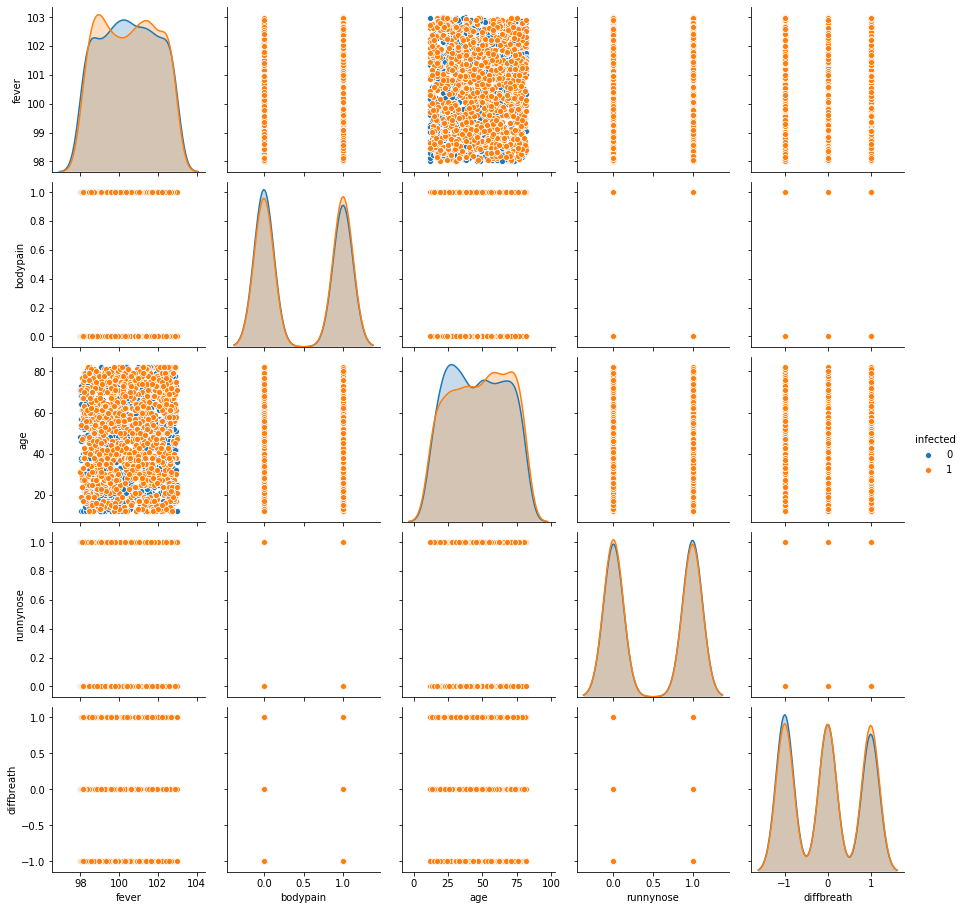

In [6]:
sns.pairplot(df, hue='infected')

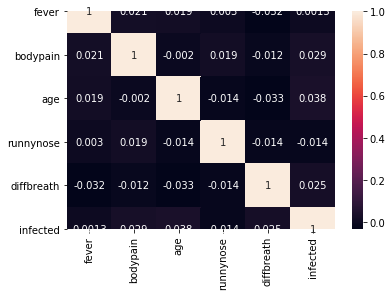

In [8]:
sns.heatmap(df.corr(), annot=True)

## Data cleanup

In [ ]:
from sklearn.preprocessing import Binarizer

averag_eage = df["age"].mean()
std_age = df["age"].std()
count_nan_age = sum(pd.isnull(df['age']))
rand = np.random.randint(average_age - 2*std_age, average_age + 2*std_age, size = count_nan_age)
dataframe["age"][np.isnan(df["age"])] = rand

df['fever'] = df['fever'].fillna(df['fever'].mean())

df['runnynose'] = np.where(df['fever'] > 100, 1, 0)

tz = Binarizer(threshold=-25.0).fit(df["bodypain"])
tz.transform(df["bodypain"], inplace=True)

## Train Test Split

In [9]:
def data_split(data, ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train,test = data_split(df, 0.3)

In [11]:
x_train = train[['fever','bodypain','age','runnynose','diffbreath']].to_numpy()
x_test = test[['fever','bodypain','age','runnynose','diffbreath']].to_numpy()
y_train = train[['infected']].to_numpy().reshape(train.shape[0],)
y_test = test[['infected']].to_numpy().reshape(test.shape[0],)

In [38]:
clf=LogisticRegression();
clf.fit(x_train, y_train);

c:\users\bidyut\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [39]:
infProb = clf.predict(x_test);
infProb = infProb.astype(int)

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, infProb)
print("CONFUSION MATRIX")
print(cm)

CONFUSION MATRIX
[[165 126]
 [157 151]]
